# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [5]:
# Caminho local do arquivo
data = 'processed.cleveland.data'

# Ler o arquivo CSV
df = pd.read_csv(data, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [10]:
# Calculando o número de saudáveis e doentes para cada sexo
tab = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
tab.columns = ['Saudável', 'Doente', 'Total']
tab.index = ['Feminino', 'Masculino', 'Total']

# Calculando a quantidade média de doentes
tab['Quantidade Média de Doentes'] = (tab['Doente'] / tab['Total']).round(2)

# Calculando Odds para cada sexo
tab['Odds'] = (tab['Doente'] / tab['Saudável']).round(2)

# Calculando Odds Ratio usando o total como referência
odds_ratio_feminino = round(tab.loc['Feminino', 'Odds'] / tab.loc['Total', 'Odds'], 2)
odds_ratio_masculino = round(tab.loc['Masculino', 'Odds'] / tab.loc['Total', 'Odds'], 2)

# Calculando o Logito (LOG(Odds))
tab['Logito'] = np.log(tab['Odds']).round(2)

# Calculando o Weight of Evidence (WOE)
woe_feminino = round(np.log(odds_ratio_feminino), 2)
woe_masculino = round(np.log(odds_ratio_masculino), 2)

print(tab)
print(f'Odds Ratio para Feminino: {odds_ratio_feminino}')
print(f'Odds Ratio para Masculino: {odds_ratio_masculino}')
print(f'WOE para Feminino: {woe_feminino}')
print(f'WOE para Masculino: {woe_masculino}')

           Saudável  Doente  Total  Quantidade Média de Doentes  Odds  Logito
Feminino         72      25     97                         0.26  0.35   -1.05
Masculino        92     114    206                         0.55  1.24    0.22
Total           164     139    303                         0.46  0.85   -0.16
Odds Ratio para Feminino: 0.41
Odds Ratio para Masculino: 1.46
WOE para Feminino: -0.89
WOE para Masculino: 0.38


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [21]:
# Categorizando a variável 'age' em 5 grupos
bins = [0, 30, 40, 50, 60, 100]
labels = ['0-30', '31-40', '41-50', '51-60', '61-100']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculando a bivariada para a variável age_category
tab_age = pd.crosstab(df['age_category'], df['flag_doente'], margins=True)
tab_age.columns = ['Saudável', 'Doente', 'Total']
tab_age['Quantidade Média de Doentes'] = (tab_age['Doente'] / tab_age['Total']).round(2)
tab_age['Odds'] = (tab_age['Doente'] / tab_age['Saudável']).round(2)

# Calculando Odds Ratio usando o total como referência
tab_age['Odds Ratio'] = (tab_age['Odds'] / tab_age.loc['All', 'Odds']).round(2)

# Calculando o Logito (LOG(Odds))
tab_age['Logito'] = tab_age['Odds'].apply(lambda x: np.log(x) if x > 0 else 0).round(2)

# Calculando o Weight of Evidence (WOE)
tab_age['WOE'] = tab_age['Odds Ratio'].apply(lambda x: np.log(x) if x > 0 else 0).round(2)

# Calculando o valor médio da variável age
mean_age = round(df['age'].mean(), 2)

print(tab_age)
print(f"Valor médio da variável age: {mean_age}")

              Saudável  Doente  Total  Quantidade Média de Doentes  Odds  \
age_category                                                               
0-30                 1       0      1                         0.00  0.00   
31-40               10       4     14                         0.29  0.40   
41-50               50      22     72                         0.31  0.44   
51-60               65      60    125                         0.48  0.92   
61-100              38      53     91                         0.58  1.39   
All                164     139    303                         0.46  0.85   

              Odds Ratio  Logito   WOE  
age_category                            
0-30                0.00    0.00  0.00  
31-40               0.47   -0.92 -0.76  
41-50               0.52   -0.82 -0.65  
51-60               1.08   -0.08  0.08  
61-100              1.64    0.33  0.49  
All                 1.00   -0.16  0.00  
Valor médio da variável age: 54.44


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

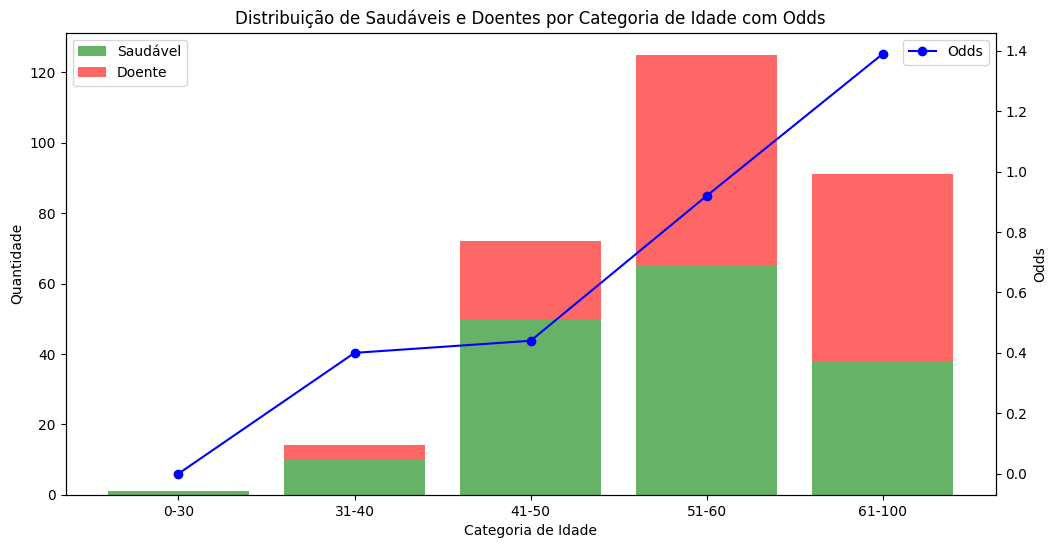

In [23]:
# Coletando os dados
labels = tab_age.index[:-1]  # Removendo o 'All'
saudavel = tab_age['Saudável'][:-1]
doente = tab_age['Doente'][:-1]
odds = tab_age['Odds'][:-1]

# Configurando o gráfico de barras empilhadas
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(labels, saudavel, label='Saudável', alpha=0.6, color='g')
ax1.bar(labels, doente, bottom=saudavel, label='Doente', alpha=0.6, color='r')
ax1.set_xlabel('Categoria de Idade')
ax1.set_ylabel('Quantidade')
ax1.legend(loc='upper left')

# Traçando uma linha para Odds usando o segundo eixo y
ax2 = ax1.twinx()
ax2.plot(labels, odds, label='Odds', marker='o', color='b')
ax2.set_ylabel('Odds')
ax2.legend(loc='upper right')

plt.title('Distribuição de Saudáveis e Doentes por Categoria de Idade com Odds')
plt.show()